### This project is based on Insta cart data set. The data source is https://www.kaggle.com/c/instacart-market-basket-analysis/data. As this was a huge data set consisting of 3 million orders. There were around 10 products in one order, so the total rows the order file was around 30 million. So, I connected this file to Oracle database and then access the data set with the help of SQL queries. The results were visualized using matplotlib liabrary of the python. This dataset consist of the below files.

Aisles.csv- Aisle id and the name of the aisle

Department.csv-Department name and its corresponding id.

Products.csv- Product id, Product name and its corresponding department and aisle

Orders.csv- Orderid, userid, odernumber, which day of the week order was place and which hour of the day it was placed.

Order_Product table- details of 3 million orders, One order was having approximate 10 product in it.


In [1]:
#Oracle connection setup
import cx_Oracle
connection = cx_Oracle.connect('nehauser/neha123')
cursor = connection.cursor()

### For the demo purpose we have kept the limit. As this data set is very large it will take a lot of time to upload it into Oracle data base.

In [2]:
limit=10000

# Create Tables

In [3]:
#create aisle table
try:
    query_String = "drop table aisles_t cascade constraints"
    cursor.execute(query_String)
    print "dropped"
except:
    print "already dropped"
    
try:
    query_String="Create table aisles_t (aisles_id number not null,aisles varchar(50),constraint aisles_id_PK PRIMARY KEY (aisles_id))"
    cursor.execute(query_String)
    print"Table created"
except:
    print"Table already there"

cursor.execute("commit")


dropped
Table created


# Insert Data

In [4]:
#insert data into aisles table
import csv
with open('aisles.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    count=0
    for row in csv_reader:
        if count==0:
            count=1
            continue
        query_String="Insert into aisles_t(aisles_id,aisles) values(" + row[0] + "," + "'" + row[1]+ "'" +")"
        cursor.execute(query_String)
        count=count+1
cursor.execute("commit")
print "Number of successful records are "+str(count)

Number of successful records are 135


 # Create Table

In [5]:
#create department table
try:
    query_String = "drop table department_t cascade constraints"
    cursor.execute(query_String)
    print "Droped"
except:
    print "Already droped"
    
    
try:
    query_String="Create table department_t (department_id number not null,dept_name varchar(50), constraint department_id_PK PRIMARY KEY (department_id))"
    cursor.execute(query_String)
    print"Table created"
except:
    print"Table already there"

cursor.execute("commit")


Droped
Table created


# Insert Data

In [6]:
#insert data into department table
with open('departments.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    count=0
    for row in csv_reader:
        if count==0:
            count=1
            continue
        query_String="Insert into department_t(department_id,dept_name) values(" + row[0] + "," + "'" + row[1]+ "'" +")"
        cursor.execute(query_String)
        count=count+1
cursor.execute("commit")
print "Number of successful records are "+str(count)

Number of successful records are 22


# Create Table

In [7]:
#create product table
try:
    query_String = "drop table products_t cascade constraints"
    cursor.execute(query_String)
    print "Droped"
except:
    print "Already droped"
    
cursor.execute("commit")

try:
    query_String ="""CREATE TABLE products_t
             (product_id         number    NOT NULL,
              product_name            VARCHAR(250)  ,
              aisles_id            number    NOT NULL,
              department_id       number    NOT NULL,
CONSTRAINT product_t_PK PRIMARY KEY (product_id),
CONSTRAINT product_t_FK FOREIGN KEY (aisles_id) REFERENCES aisles_t(aisles_id),
CONSTRAINT product_t_FK2 FOREIGN KEY (department_id) REFERENCES department_t(department_id))"""
    cursor.execute(query_String)
    print"Table created"
except:
    print"Table already there"

cursor.execute("commit")


Droped
Table created


# Insert Data

In [8]:
#insert data into product table
import csv
import sys
with open('products.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    count=0
    for row in csv_reader:
        if count==0:
            count=1
            continue
        product_id=row[0]
        product_name=row[1].replace("'","")
        aisles_id=row[2]
        department_id=row[3]
        query_String="Insert into products_t(product_id,product_name,aisles_id,department_id) values(" + product_id + "," + "'" + product_name + "'" + "," + aisles_id+ "," + department_id+")"
        try: 
            cursor.execute(query_String)
            count=count+1
        except :
            print "skipped" , query_String , sys.exc_info()[0]
        if count%10000==0:
            cursor.execute("commit")
cursor.execute("commit")
print "Number of successful records are "+str(count)

Number of successful records are 49689


# Create Table

In [9]:
#create order_products_prior table
try:
    query_String = "drop table order_products__prior_t cascade constraints"
    cursor.execute(query_String)
    print "Droped"
except:
    print "Already droped"
    
cursor.execute("commit")

try:
    query_String ="""CREATE TABLE order_products__prior_t
             (order_id           number      NOT NULL,
              product_id         number      NOT NULL,
              add_to_cart_order  number      NOT NULL,
              reordered          number      NOT NULL,
              CONSTRAINT order_products__prior_PK PRIMARY KEY (order_id,product_id))"""
    cursor.execute(query_String)
    print"Table created"
except:
    print"Table already there",sys.exc_info()[0]

cursor.execute("commit")


Droped
Table created


# Insert Data

In [17]:
#insert data into order_products_prior table

import csv
import sys
with open('order_products__prior.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    count=0
    for row in csv_reader:
        if count==0:
            count=1
            continue
        order_id=row[0]
        product_id=row[1]
        add_to_cart_order=row[2]
        reordered=row[3]
        query_String="Insert into order_products__prior_t(order_id,product_id,add_to_cart_order,reordered) values(" + order_id + "," + "'" + product_id + "'" + "," + add_to_cart_order+ "," + reordered+")"
        try: 
            count=count+1
            cursor.execute(query_String)
        except :
            print "skipped" , query_String , sys.exc_info()[0]
        if count%10000==0:
            cursor.execute("commit")
            #print count
cursor.execute("commit")


# Create Table

In [11]:
#create orders table
try:
    query_String = "drop table orders_t"
    cursor.execute(query_String)
    print "Droped"
except:
    print "Already droped"
    
cursor.execute("commit")

try:
    query_String ="""CREATE TABLE orders_t
             (order_id             number      NOT NULL,
              user_id              number      NOT NULL,
              eval_set             varchar(50)              ,
              order_number         number      NOT NULL,
              order_dow            number      NOT NULL,
              order_hour_of_day    number      NOT NULL,
              days_since_prior_order number    Null         ,
CONSTRAINT orders_t_PK PRIMARY KEY (order_id))"""

    cursor.execute(query_String)
    print"Table created"
except:
    print"Table already there",sys.exc_info()[0]

cursor.execute("commit")


Droped
Table created


# Insert Data

In [ ]:
import csv
import sys
with open('orders.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    count=0
    for row in csv_reader:
        if count==0:
            count=1
            continue
        order_id=row[0]
        user_id=row[1]
        eval_set=row[2]
        order_number=row[3]
        order_dow=row[4]
        order_hour_of_day=row[5]
        days_since_prior_order=row[6]
        if row[6]=="":
            query_String="Insert into orders_t(order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day) values(" + order_id + "," +  user_id + "," + "'" + eval_set+"'"+","+ order_number +"," + order_dow + ","+ order_hour_of_day+")"
        else:
            query_String="Insert into orders_t(order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order) values(" + order_id + "," +  user_id + "," + "'" + eval_set+"'"+","+ order_number +"," + order_dow + ","+ order_hour_of_day+ ","+days_since_prior_order+ ")"
        try: 
            count=count+1
            cursor.execute(query_String)
        except :
            print "skipped" , query_String , sys.exc_info()[0]
            
        if count %10000==0:
            cursor.execute("commit")
            #print# count
cursor.execute("commit")


# Data Visualization

In [2]:
#which department has howmany orders
query_string="""SELECT count_order_id,
                       did,dept_name
                FROM(select count(order_id) as count_order_id,
                     department_id as did
                FROM(SELECT order_products__prior_t.order_id, 
                     products_t.department_id FROM order_products__prior_t,
                     products_t WHERE products_t.product_id = order_products__prior_t.product_id)
                GROUP BY department_id),department_t where did = department_t.department_id"""
targetfile = 'results\Q2_1.csv'

In [3]:
data = cursor.execute(query_string)
results =  data.fetchall()
import csv
with open(targetfile, 'wb') as csvfile:
    datawriter = csv.writer(csvfile, delimiter=',')
    datawriter.writerow(["Order_Count","Dept_ID","Dept_Name"])
    for line in results:
        datawriter.writerow(list(line))

In [4]:
# which top 5 AISLES haVE most orders
query_string=""" select aisles,id,cnt from(select aisles_id as id,cnt from (select * from(select aisles_id,cnt from (select products_t.aisles_id,count(order_products__prior_t.order_id) as cnt from products_t,order_products__prior_t where products_t.product_id=order_products__prior_t.product_id group by aisles_id) order by cnt desc))),aisles_t where aisles_t.aisles_id=id order by cnt desc"""

targetfile='results\Aisles_ordered.csv'
data = cursor.execute(query_string)
results =  data.fetchall()
import csv
with open(targetfile, 'wb') as csvfile:
    datawriter = csv.writer(csvfile, delimiter=',')
    for line in results:
        datawriter.writerow(list(line))

In [5]:
#Top 20 most ordered product
query_string=""" select product_name,id,cnt from (select * from(select product_id as id,count(order_id)as cnt from ORDER_PRODUCTS__PRIOR_T group by product_id order by cnt desc) where rownum<=20),products_t where products_t.product_id=id"""
  
targetfile='results\products_mostOrdered.csv'
data = cursor.execute(query_string)
results =  data.fetchall()
import csv
with open(targetfile, 'wb') as csvfile:
    datawriter = csv.writer(csvfile, delimiter=',')
    for line in results:
        datawriter.writerow(list(line))

In [6]:
#Busiest time
query_string="""select count(order_id)as order_count, order_dow, order_hour_of_day from orders_t group by order_dow, order_hour_of_day"""

targetfile='results\BusiestTime.csv'
data = cursor.execute(query_string)
results =  data.fetchall()
import csv
with open(targetfile, 'wb') as csvfile:
    datawriter = csv.writer(csvfile, delimiter=',')
    for line in results:
        datawriter.writerow(list(line))

In [6]:
#how many orders are there which have 1 product,2 product,3 product and like that....
import pandas as pd
query_string="""select count(order_id),cnt from (select order_id,count(product_id)as cnt from order_products__prior_t  group by order_id) group by cnt"""

targetfile='results\order_product.csv'
data = cursor.execute(query_string)
results =  data.fetchall()
import csv
with open(targetfile, 'wb') as csvfile:
    datawriter = csv.writer(csvfile, delimiter=',')
    for line in results:
        datawriter.writerow(list(line))
dataf2=pd.DataFrame(results)

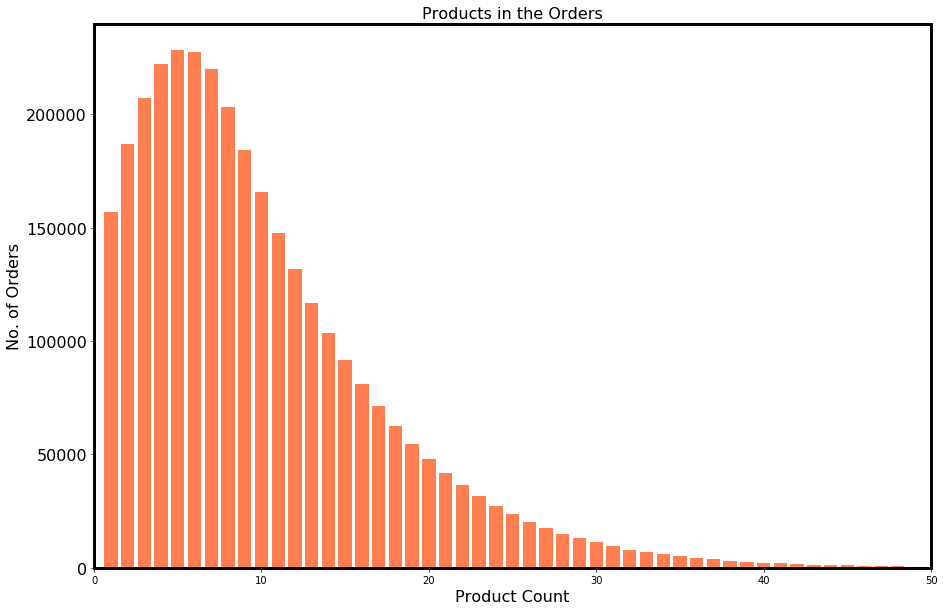

In [14]:
from matplotlib import pyplot as plt
from pylab import *
import pandas as pd
fsize=16
fig = plt.figure(figsize=(15,10))
plt.bar(dataf2.iloc[:,1],dataf2.iloc[:,0],linewidth=5, color='coral')
#plt.xticks(datanp[:,1], rotation='90', fontsize=fsize)
plt.xlim(0,50)
plt.yticks(fontsize=fsize)

plt.xlabel("Product Count",fontsize=fsize)
plt.ylabel("No. of Orders",fontsize=fsize)
plt.title("Products in the Orders",fontsize=fsize)

# Again, this doesn't work in interactive mode.
[i.set_linewidth(3) for i in gca().spines.itervalues()]
plt.savefig('neha.png',bbox_inches='tight')
plt.show()

In [12]:
#Top 20 most ordered product plot here
import pandas as pd
query_string=""" select product_name,id,cnt from (select * from(select product_id as id,count(order_id)as cnt from ORDER_PRODUCTS__PRIOR_T group by product_id order by cnt desc) where rownum<=20),products_t where products_t.product_id=id"""
  
targetfile='results\products_mostOrdered.csv'
data = cursor.execute(query_string)
results =  data.fetchall()
resultsDf=pd.DataFrame(results)



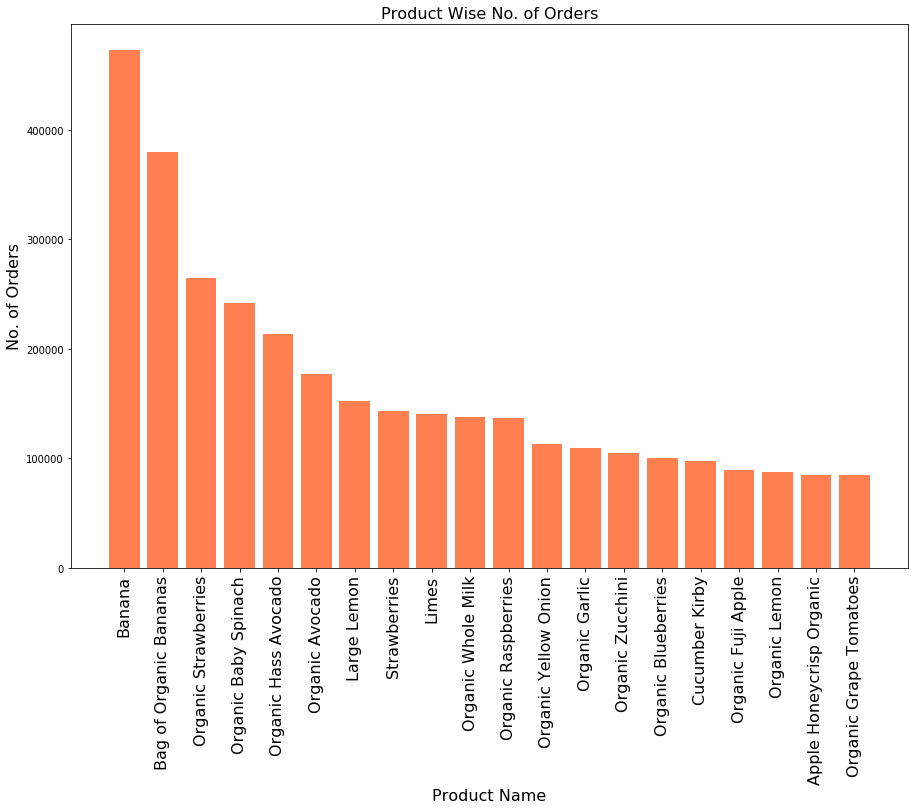

In [15]:
fsize=16
fig = plt.figure(figsize=(15,10))
plt.bar(resultsDf.iloc[:,0],resultsDf.iloc[:,2],linewidth=5, color='coral')
plt.xticks(resultsDf.iloc[:,0],rotation='90', fontsize=fsize)
#plt.yticks(fontsize=fsize)
plt.xlabel("Product Name",fontsize=fsize)
plt.ylabel("No. of Orders",fontsize=fsize)
plt.title("Product Wise No. of Orders",fontsize=fsize)

# Again, this doesn't work in interactive mode.
#[i.set_linewidth(3) for i in gca().spines.itervalues()]
plt.savefig('neha1.png',bbox_inches='tight')
plt.show()
